# REAL TIME DIGIT RECOGNITION FOR SINGLE DIGITS- Training

In [1]:
#Importing Libraries
import tensorflow as tf
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
noOfClasses=10 # 0-9 digits
imgs=[] #list to save images
classes=[] #list for corresponding classes of images

for i in range(0,noOfClasses):
    imgList=os.listdir('Data/'+str(i))
    for j in imgList:
        currentImg=cv2.imread('Data/'+str(i)+'/'+str(j))
        currentImg=cv2.resize(currentImg,(32,32))
        imgs.append(currentImg)
        classes.append(i)
        
print(len(imgs)) #Length of image list
print(len(classes)) #Length of class list

10160
10160


In [3]:
# Converting to numpy array

imgs=np.array(imgs)
classes=np.array(classes)
print("Shape of Images list : "+str(imgs.shape)+" & Shape of classes list : "+str(classes.shape))

Shape of Images list : (10160, 32, 32, 3) & Shape of classes list : (10160,)


## Now once we have all the data ready we need to split them into Training and Testing Data

In [4]:
train_imgs,test_imgs,train_labels,test_labels=train_test_split(imgs,classes,test_size=0.2)
print("Training Images Shape : "+str(train_imgs.shape))
print("Testing Images Shape : "+str(test_imgs.shape))

Training Images Shape : (8128, 32, 32, 3)
Testing Images Shape : (2032, 32, 32, 3)


## Now we need some validation data as well so lets split Train_images into training and validation data

In [5]:
train_imgs,val_imgs,train_labels,val_labels=train_test_split(train_imgs,train_labels,test_size=0.2)
print("Training Images Shape : "+str(train_imgs.shape))
print("Validation Images Shape : "+str(val_imgs.shape))

Training Images Shape : (6502, 32, 32, 3)
Validation Images Shape : (1626, 32, 32, 3)


In [6]:
# To find length of index values where numbers are is present 
# Lets save them in a list

noOflabelSamples=[]
for i in range(0,noOfClasses):
    noOflabelSamples.append(len(np.where(train_labels==i)[0]))

# Lets print them

# for i in range(0,noOfClasses):
#     print("Class " + str(i) + " : " + str(noOflabelSamples[i]))

print(noOflabelSamples)

[647, 665, 655, 672, 642, 644, 639, 649, 668, 621]


## Lets Plot our results

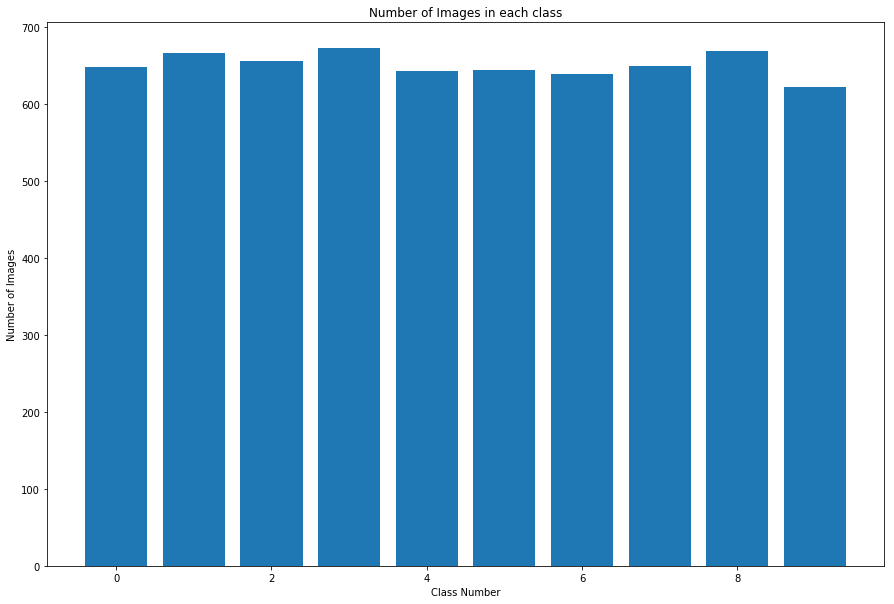

In [7]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.bar(range(0,noOfClasses),noOflabelSamples)
plt.title("Number of Images in each class")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

# Converting our images to grayscale and preprocess the input so all our images are properly visible to the network when training

In [8]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

In [9]:
# Now Preprocessing

train_imgs= np.array(list(map(preProcess,train_imgs)))
test_imgs= np.array(list(map(preProcess,test_imgs)))
val_imgs= np.array(list(map(preProcess,val_imgs)))

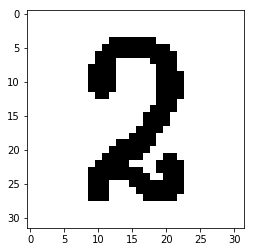

In [10]:
#To test if the images are properly preprocessed

img=train_imgs[30]
plt.imshow(img, cmap='gray', interpolation='none')

# Display using OpenCv
# cv2.imshow("Preprocessed",img.astype('uint8') * 255)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
print("Training Images Shape : "+str(train_imgs.shape))
print("Testing Images Shape : "+str(test_imgs.shape))
print("Validation Images Shape : "+str(val_imgs.shape))

Training Images Shape : (6502, 32, 32)
Testing Images Shape : (2032, 32, 32)
Validation Images Shape : (1626, 32, 32)


## For better Training we Augment the Images 

- To augment images we use ImageDataGenerator which requires rank four shape

### So we have to reshape images

In [12]:
train_imgs = train_imgs.reshape(train_imgs.shape[0],train_imgs.shape[1],train_imgs.shape[2],1)
test_imgs = test_imgs.reshape(test_imgs.shape[0],test_imgs.shape[1],test_imgs.shape[2],1)
val_imgs = val_imgs.reshape(val_imgs.shape[0],val_imgs.shape[1],val_imgs.shape[2],1)

datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(train_imgs)

In [13]:
## Creating Convolutional Neural Network Model
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(60,(5,5),activation='relu',input_shape=(32,32,1)),
            tf.keras.layers.Conv2D(60,(5,5),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(30,(3,3),activation='relu'),
            tf.keras.layers.Conv2D(30,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [14]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

## Time to train the model

In [17]:
history = model.fit(datagen.flow(train_imgs,train_labels,batch_size=50),
                                 epochs=10,
                                 validation_data=(val_imgs,val_labels))

  ...
    to  
  ['...']
Train for 131 steps, validate on 1626 samples
Epoch 1/10
131/131 [==============================] - 61s 469ms/step - loss: 0.3046 - acc: 0.9011 - val_loss: 0.0664 - val_acc: 0.9785
Epoch 2/10
131/131 [==============================] - 64s 488ms/step - loss: 0.2480 - acc: 0.9225 - val_loss: 0.0519 - val_acc: 0.9846
Epoch 3/10
131/131 [==============================] - 68s 517ms/step - loss: 0.2282 - acc: 0.9268 - val_loss: 0.0487 - val_acc: 0.9865
Epoch 4/10
131/131 [==============================] - 51s 386ms/step - loss: 0.1697 - acc: 0.9439 - val_loss: 0.0380 - val_acc: 0.9865
Epoch 5/10
131/131 [==============================] - 50s 381ms/step - loss: 0.1487 - acc: 0.9536 - val_loss: 0.0322 - val_acc: 0.9895
Epoch 6/10
131/131 [==============================] - 49s 375ms/step - loss: 0.1472 - acc: 0.9548 - val_loss: 0.0242 - val_acc: 0.9932
Epoch 7/10
131/131 [==============================] - 49s 378ms/step - loss: 0.1295 - acc: 0.9588 - val_loss: 0.0323 - 

## Lets Plot the results

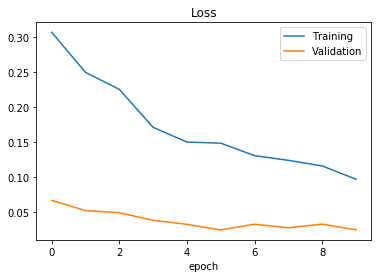

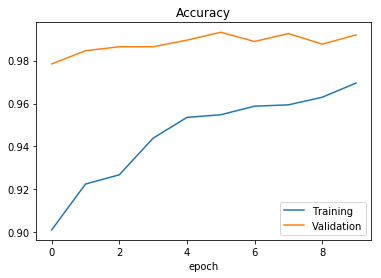

In [18]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

## Now lets evalute the Training

In [20]:
score = model.evaluate(test_imgs,test_labels,verbose=0)
print('Test Score : ',score[0])
print('Test Accuracy : ', score[1])

Test Score :  0.02635903046924756
Test Accuracy :  0.992126


## Save The  MODEL 

In [22]:
model.save('trained_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: trained_model\assets
